In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

data = pd.read_csv("diabetes.csv")

data.head()

Saving diabetes.csv to diabetes (3).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533


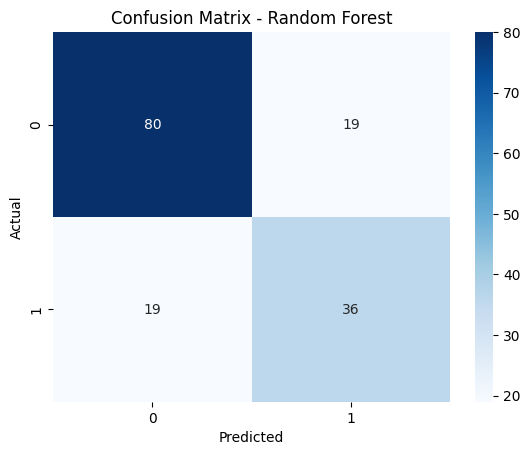

In [2]:
import numpy as np

cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zero_invalid] = data[cols_with_zero_invalid].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = rf.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

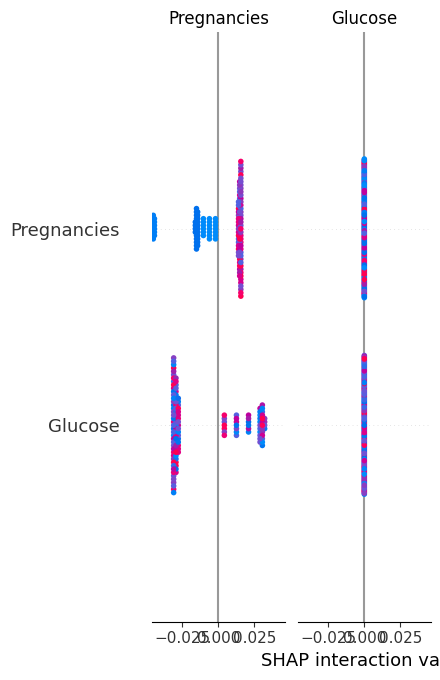

In [3]:
import shap
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [4]:
import gradio as gr
import numpy as np

def predict_diabetes(preg, glu, bp, skin, ins, bmi, dpf, age):
    input_data = np.array([[preg, glu, bp, skin, ins, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    prediction = rf.predict(input_scaled)
    return "Diabetic" if prediction[0] == 1 else "Not Diabetic"

interface = gr.Interface(
    fn=predict_diabetes,
    inputs=["number"] * 8,
    outputs="text",
    title="🩺 Diabetes Risk Predictor",
    description="Enter medical parameters to predict diabetes risk using a trained ML model."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3cf7edb8fb7786d933.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
heart = pd.read_csv("heart.csv")
heart.head()

Saving heart.csv to heart (3).csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
print(heart.isnull().sum())
heart_encoded = pd.get_dummies(heart, drop_first=True)
X_h = heart_encoded.drop('HeartDisease', axis=1)
y_h = heart_encoded['HeartDisease']

from sklearn.model_selection import train_test_split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_h, y_h, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler_h = StandardScaler()
Xh_train_scaled = scaler_h.fit_transform(Xh_train)
Xh_test_scaled = scaler_h.transform(Xh_test)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
log_heart = LogisticRegression(max_iter=1000)
log_heart.fit(Xh_train_scaled, yh_train)
pred_log_heart = log_heart.predict(Xh_test_scaled)
rf_heart = RandomForestClassifier()
rf_heart.fit(Xh_train, yh_train)
pred_rf_heart = rf_heart.predict(Xh_test)
print("Logistic Regression on Heart Disease:")
print(classification_report(yh_test, pred_log_heart))

print("Random Forest on Heart Disease:")
print(classification_report(yh_test, pred_rf_heart))


Logistic Regression on Heart Disease:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Random Forest on Heart Disease:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



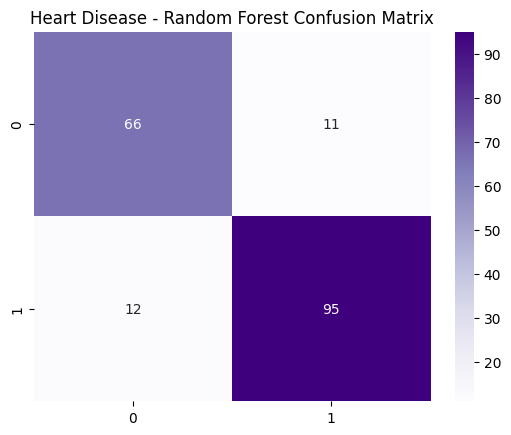

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(yh_test, pred_rf_heart), annot=True, fmt='d', cmap='Purples')
plt.title("Heart Disease - Random Forest Confusion Matrix")
plt.show()